In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)

In [3]:
data = pd.read_csv('tra_.csv',index_col='ID')

In [4]:
d12 = data['A12'] >4
d13 = data['A13'] >4
d14 = data['A14'] >4
data['total'] = d12 + d13 +d14
data['total'] = data['total'].map({True:1, False:0})

data.drop(['A12'], axis=1, inplace= True)
data.drop(['A13'], axis=1, inplace= True)
data.drop(['A14'], axis=1, inplace= True)
data.drop(['BARA'],axis=1, inplace= True)

C:\Users\rhkdg\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [5]:
data=data[data['D_TRA1_CASE']==1]

In [6]:
spot = data['D_TRA1_1_SPOT1']

In [7]:
data.shape

(17867, 70)

# 결측치 처리

In [8]:
all_na = (data.isnull().sum() / len(data)) * 100
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_na})

Text(0.5, 1.0, 'Percent missing data by feature')

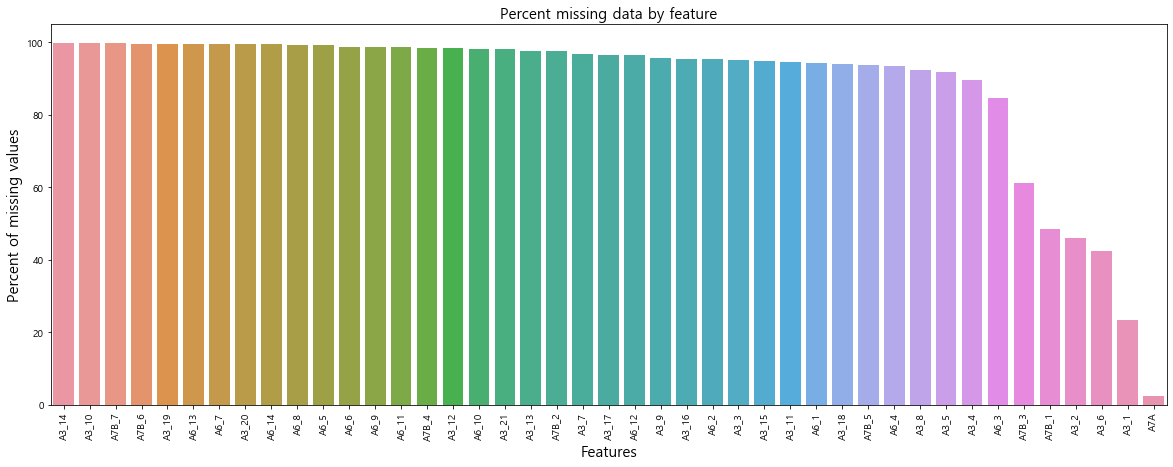

In [9]:
f, ax = plt.subplots(figsize=(20, 7))
plt.xticks(rotation='90')
sns.barplot(x=all_na.index, y=all_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [10]:
data['A1']=data['A1'].map({1:1,2:0})

In [11]:
for i in range(21):
    data['A3_{}'.format(i+1)] = data['A3_{}'.format(i+1)].fillna(0)
    data['A3_{}'.format(i+1)] = data['A3_{}'.format(i+1)].map({i+1:1,0:0})

In [12]:
for i in range(1, 15) :
    data[f'A6_{i}'] = data[f'A6_{i}'].fillna(value = 0)
    data[f'A6_{i}'] = data[f'A6_{i}'].map({i:1,0:0})

In [13]:
data['A7A']=data['A7A'].fillna(0)
for i in range(7):
    data['A7B_{}'.format(i+1)] = data['A7B_{}'.format(i+1)].fillna(0)
    data['A7B_{}'.format(i+1)] = data['A7B_{}'.format(i+1)].map({i+1:1,0:0})

# 결측치 확인

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17867 entries, 1 to 48267
Data columns (total 70 columns):
Q                 17867 non-null int64
D_TRA1_1_SPOT1    17867 non-null float64
D_TRA1_SMONTH     17867 non-null float64
D_TRA1_S_Day      17867 non-null float64
D_TRA1_COST       17867 non-null float64
D_TRA1_NUM        17867 non-null float64
D_TRA1_CASE       17867 non-null float64
A1                17867 non-null int64
A2_1              17867 non-null float64
A3_1              17867 non-null int64
A3_2              17867 non-null int64
A3_3              17867 non-null int64
A3_4              17867 non-null int64
A3_5              17867 non-null int64
A3_6              17867 non-null int64
A3_7              17867 non-null int64
A3_8              17867 non-null int64
A3_9              17867 non-null int64
A3_10             17867 non-null int64
A3_11             17867 non-null int64
A3_12             17867 non-null int64
A3_13             17867 non-null int64
A3_14             1

## 변수 타입별 정리

In [15]:
n_f = data.dtypes[data.dtypes != 'object'].index
n_f

Index(['Q', 'D_TRA1_1_SPOT1', 'D_TRA1_SMONTH', 'D_TRA1_S_Day', 'D_TRA1_COST',
       'D_TRA1_NUM', 'D_TRA1_CASE', 'A1', 'A2_1', 'A3_1', 'A3_2', 'A3_3',
       'A3_4', 'A3_5', 'A3_6', 'A3_7', 'A3_8', 'A3_9', 'A3_10', 'A3_11',
       'A3_12', 'A3_13', 'A3_14', 'A3_15', 'A3_16', 'A3_17', 'A3_18', 'A3_19',
       'A3_20', 'A3_21', 'A4_1', 'A5_1', 'A6_1', 'A6_2', 'A6_3', 'A6_4',
       'A6_5', 'A6_6', 'A6_7', 'A6_8', 'A6_9', 'A6_10', 'A6_11', 'A6_12',
       'A6_13', 'A6_14', 'A7', 'A7A', 'A7B_1', 'A7B_2', 'A7B_3', 'A7B_4',
       'A7B_5', 'A7B_6', 'A7B_7', 'A10A', 'A10B', 'A10C', 'A10D', 'A10E',
       'A10F', 'A10G', 'A10H', 'A10I', 'A10', 'DQ6A', 'BSEX', 'BAGE', 'BJOB',
       'total'],
      dtype='object')

In [16]:
n_f=['D_TRA1_S_Day', 'D_TRA1_COST', 'A1', 'A3_1', 'A3_2', 'A3_3',
       'A3_4', 'A3_5', 'A3_6', 'A3_7', 'A3_8', 'A3_9', 'A3_10', 'A3_11',
       'A3_12', 'A3_13', 'A3_14', 'A3_15', 'A3_16', 'A3_17', 'A3_18', 'A3_19',
       'A3_20', 'A3_21', 'A6_1', 'A6_2', 'A6_3', 'A6_4', 'A6_5', 'A6_6',
       'A6_7', 'A6_8', 'A6_9', 'A6_10', 'A6_11', 'A6_12', 'A6_13', 'A6_14',
       'A7', 'A7A', 'A7B_1', 'A7B_2', 'A7B_3', 'A7B_4', 'A7B_5', 'A7B_6',
       'A7B_7', 'A10A', 'A10B', 'A10C', 'A10D', 'A10E', 'A10F', 'A10G', 'A10H',
       'A10I', 'A10', 'DQ6A','Ncost', 'DNcost', 'A3sum']

In [17]:
b_f = ['A1', 'A3_1', 'A3_2', 'A3_3',
       'A3_4', 'A3_5', 'A3_6', 'A3_7', 'A3_8', 'A3_9', 'A3_10', 'A3_11',
       'A3_12', 'A3_13', 'A3_14', 'A3_15', 'A3_16', 'A3_17', 'A3_18', 'A3_19',
       'A3_20', 'A3_21', 'A6_1', 'A6_2', 'A6_3', 'A6_4', 'A6_5', 'A6_6',
       'A6_7', 'A6_8', 'A6_9', 'A6_10', 'A6_11', 'A6_12', 'A6_13', 'A6_14',
       'A7B_1', 'A7B_2', 'A7B_3', 'A7B_4', 'A7B_5', 'A7B_6','A7B_7']

In [18]:
for i in b_f:
    n_f.remove(i)

# 새로운 특성 추가

In [19]:
data['Ncost'] = data['D_TRA1_COST']/data['D_TRA1_NUM']

In [20]:
data['DNcost'] = data['Ncost']/(data['D_TRA1_S_Day']+1)

In [21]:
data['A3sum'] = data['A3_1']
for i in range(1,21):
    data['A3sum'] = data['A3sum'] + data['A3_{}'.format(i+1)]

In [22]:
# 명목형 변수 인코딩
lst = ['A2_1','A4_1','A5_1','BSEX','BJOB','D_TRA1_CASE']
for col in lst:
    data[col] = data[col].apply(str)

# 이상치 처리

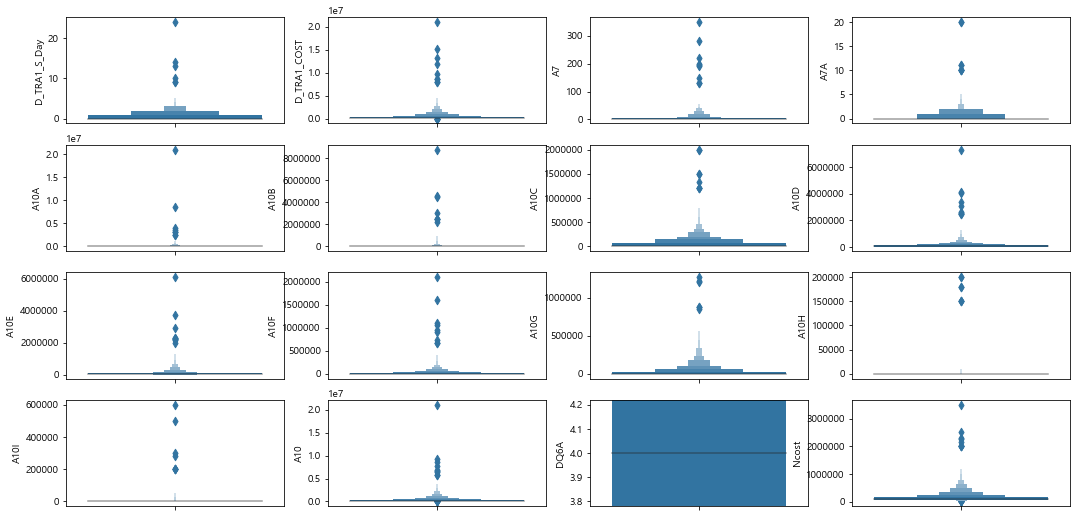

In [23]:
fig, ax = plt.subplots(figsize=(18,9),ncols=4, nrows=4)
for i in range(len(n_f)-2):
    sns.boxenplot(data=data, y=n_f[i], ax=ax[i//4,i%4])
plt.show()

In [24]:
data=data[(data['D_TRA1_S_Day']>4)==False]
data=data[(data['D_TRA1_COST']>2000000)==False]
data=data[(data['A7']>10)==False]
data=data[(data['A10A']>500000)==False]
data=data[(data['A10B']>200000)==False]
data=data[(data['A10C']>200000)==False]
data=data[(data['A10D']>500000)==False]
data=data[(data['A10E']>250000)==False]
data=data[(data['A10F']>100000)==False]
data=data[(data['A10G']>100000)==False]
data=data[(data['A10H']>20000)==False]
data=data[(data['A10I']>20000)==False]

data.shape

(14264, 73)

#  EDA

## 변수분석

Text(0, 0.5, 'count')

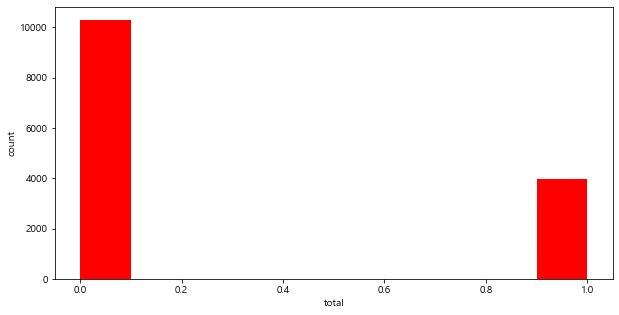

In [25]:
plt.figure(figsize=(10,5))
plt.hist(data['total'],color='red')
plt.xlabel('total')
plt.ylabel('count')

In [26]:
data.corr()['total'].sort_values().head(5)

A3_6    -0.022303
A3_19   -0.020007
A10I    -0.019532
A3_4    -0.019367
DQ6A    -0.018392
Name: total, dtype: float64

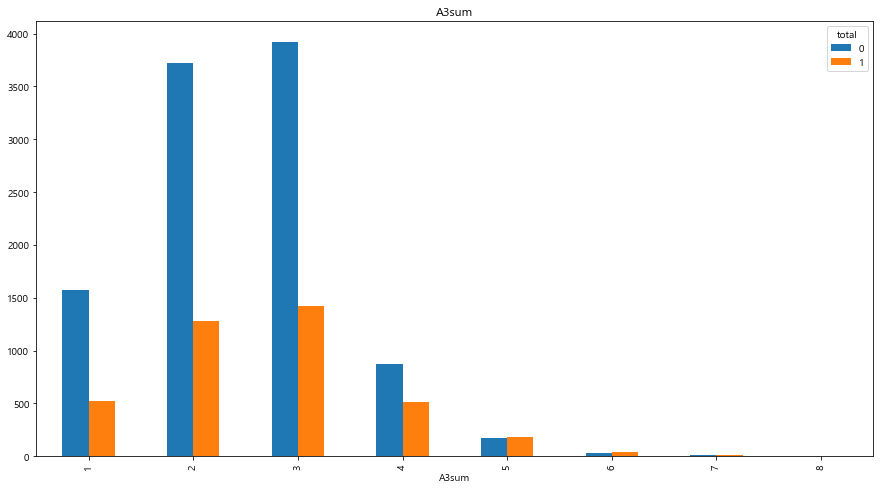

In [27]:
a3df = data.groupby(['A3sum','total'])['total'].count().unstack('total')
a3df.plot(kind='bar', figsize=(15,8))
plt.title('A3sum')
plt.show()

## 변수 타입별 정리

In [28]:
n_f = data.dtypes[data.dtypes != 'object'].index
n_f

Index(['Q', 'D_TRA1_1_SPOT1', 'D_TRA1_SMONTH', 'D_TRA1_S_Day', 'D_TRA1_COST',
       'D_TRA1_NUM', 'A1', 'A3_1', 'A3_2', 'A3_3', 'A3_4', 'A3_5', 'A3_6',
       'A3_7', 'A3_8', 'A3_9', 'A3_10', 'A3_11', 'A3_12', 'A3_13', 'A3_14',
       'A3_15', 'A3_16', 'A3_17', 'A3_18', 'A3_19', 'A3_20', 'A3_21', 'A6_1',
       'A6_2', 'A6_3', 'A6_4', 'A6_5', 'A6_6', 'A6_7', 'A6_8', 'A6_9', 'A6_10',
       'A6_11', 'A6_12', 'A6_13', 'A6_14', 'A7', 'A7A', 'A7B_1', 'A7B_2',
       'A7B_3', 'A7B_4', 'A7B_5', 'A7B_6', 'A7B_7', 'A10A', 'A10B', 'A10C',
       'A10D', 'A10E', 'A10F', 'A10G', 'A10H', 'A10I', 'A10', 'DQ6A', 'BAGE',
       'total', 'Ncost', 'DNcost', 'A3sum'],
      dtype='object')

In [29]:
n_f=['D_TRA1_S_Day', 'D_TRA1_COST', 'A1', 'A3_1', 'A3_2', 'A3_3',
       'A3_4', 'A3_5', 'A3_6', 'A3_7', 'A3_8', 'A3_9', 'A3_10', 'A3_11',
       'A3_12', 'A3_13', 'A3_14', 'A3_15', 'A3_16', 'A3_17', 'A3_18', 'A3_19',
       'A3_20', 'A3_21', 'A6_1', 'A6_2', 'A6_3', 'A6_4', 'A6_5', 'A6_6',
       'A6_7', 'A6_8', 'A6_9', 'A6_10', 'A6_11', 'A6_12', 'A6_13', 'A6_14',
       'A7', 'A7A', 'A7B_1', 'A7B_2', 'A7B_3', 'A7B_4', 'A7B_5', 'A7B_6',
       'A7B_7', 'A10A', 'A10B', 'A10C', 'A10D', 'A10E', 'A10F', 'A10G', 'A10H',
       'A10I', 'A10', 'DQ6A','Ncost', 'DNcost', 'A3sum']

In [30]:
b_f = ['A1', 'A3_1', 'A3_2', 'A3_3',
       'A3_4', 'A3_5', 'A3_6', 'A3_7', 'A3_8', 'A3_9', 'A3_10', 'A3_11',
       'A3_12', 'A3_13', 'A3_14', 'A3_15', 'A3_16', 'A3_17', 'A3_18', 'A3_19',
       'A3_20', 'A3_21', 'A6_1', 'A6_2', 'A6_3', 'A6_4', 'A6_5', 'A6_6',
       'A6_7', 'A6_8', 'A6_9', 'A6_10', 'A6_11', 'A6_12', 'A6_13', 'A6_14',
       'A7B_1', 'A7B_2', 'A7B_3', 'A7B_4', 'A7B_5', 'A7B_6','A7B_7']

In [31]:
for i in b_f:
    n_f.remove(i)

In [32]:
feature=[]

## 이진 변수
### - 점 양분 상관 계수
> 한 변수는 있음/없음, 네/아니오 등으로 이분형(binary) 이고, 다른 한 변수는 연속형인 경우에도 상관계수를 구할 수 있습니다.

- p-value가 0.05보다 클 경우 변수간의 상관관계가 존재하지 않음 

https://mansoostat.tistory.com/115

In [33]:
from scipy.stats import pointbiserialr
for i in b_f:
    corr, pval = pointbiserialr(data[i],data['total'])
    if pval <0.05:
        print(i,pval)
        feature.append(i)

A1 2.2870626236182395e-08
A3_1 2.259981769550903e-06
A3_2 0.005070640996469748
A3_3 1.818127772199553e-05
A3_4 0.020721386904102992
A3_6 0.007727836846003201
A3_7 0.03171838820236732
A3_8 0.02172815843769476
A3_9 0.0004933473225843737
A3_11 5.234441864090876e-32
A3_15 3.3956135917268714e-36
A3_17 0.0003709178224353249
A3_18 0.021974833603606813
A3_19 0.01686874086643154
A3_21 5.1280653148808866e-05
A6_4 3.166963697473499e-10
A6_5 0.03419596697619582
A6_8 0.046586712464743905
A6_9 0.04996307028079554
A6_12 0.030755675861788682


## 연속형 변수
### - 피어슨 상관 계수
- 연속형 변수 2개의 상관 관계를 확인하기 위한 가장 기본적인 방법이다.

>정확히 말해서 두개의 수치값들의 집합이 있을 때 이 두개의 수치값들은 각각의 순서쌍에 대해서 연결관계가 있다고 할 때 두 수치값이 서로 관련이 있는지를 확인하는 방법이다.

>흔한 예로 있는 것이 고등학생 한 학급에 50명이 있다고 할 때 이 학생들의 수학과목의 성적과 물리과목의 성정이 관련이 있는지 확인하는 것이 있다. 즉 수학과목과 물리과목은 서로 수리적 또는 과학적 능력과 관련이 있어 두 과목은 서로 관련이 있을 것이라는 가설을 어느 정도 두고 있으며 실제로 그런지 확인한다.

- p-value가 0.05보다 클 경우 변수간의 상관관계가 존재하지 않음 

https://intothedata.com/02.scholar_category/statistics/correlation/

https://bskyvision.com/754

In [34]:
from scipy import stats
for i in n_f:
    corr, pval = stats.pearsonr(data[i],data['total'])
    if pval <0.05:
        print(i,pval)
        feature.append(i)

D_TRA1_S_Day 5.56558609253701e-09
D_TRA1_COST 0.0021065327882162153
A10A 0.031999653263354765
A10C 6.09370038228843e-06
A10D 0.0017384911821455736
A10E 4.728566967041035e-10
A10F 4.318470766211121e-15
A10G 4.3438824440318964e-07
A10I 0.019660344193188316
A10 6.341070831465333e-13
DQ6A 0.028050230753400848
Ncost 6.816354094243468e-08
DNcost 0.008862467714145868
A3sum 4.685031844839223e-32


In [35]:
lst

['A2_1', 'A4_1', 'A5_1', 'BSEX', 'BJOB', 'D_TRA1_CASE']

In [36]:
# 명목형 변수 인코딩
lst = ['D_TRA1_SMONTH','A2_1','A4_1','A5_1','BSEX','BAGE','BJOB','D_TRA1_CASE']
for col in lst:
    data[col] = data[col].apply(str)

In [37]:
obdata=pd.DataFrame()
for i in lst:
    obdata[i]=data[i]

obdata = pd.get_dummies(obdata)

In [38]:
obfeature=[]
from scipy.stats import pointbiserialr
for i in obdata.dtypes.index:
    corr, pval = pointbiserialr(obdata[i],data['total'])
    if pval <0.05:
        print(i,pval)
        obfeature.append(i)

D_TRA1_SMONTH_8.0 0.0040601396403184085
D_TRA1_SMONTH_9.0 0.005678567025955426
A2_1_1.0 1.5256415165717032e-05
A2_1_10.0 0.0018913604921662612
A2_1_11.0 0.018391161813960052
A2_1_14.0 0.0007591636377409268
A2_1_3.0 0.0031615057796021986
A2_1_4.0 1.3255270656406784e-06
A2_1_5.0 0.019322386422030362
A2_1_8.0 0.011706080951503732
A2_1_9.0 0.018801693895758077
A4_1_5.0 0.016158403438768235
A4_1_6.0 0.009610295227629566
A4_1_7.0 6.82534530214056e-06
A4_1_8.0 0.010197558375953455
A4_1_9.0 0.028589564590388878
A5_1_1.0 0.019252819941976983
A5_1_3.0 0.026829845805874216
A5_1_4.0 0.013657338535708484
A5_1_7.0 0.04900454747620907
BAGE_1 0.037560897755762136


C:\Users\rhkdg\Anaconda3\lib\site-packages\scipy\stats\stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [39]:
feature

['A1',
 'A3_1',
 'A3_2',
 'A3_3',
 'A3_4',
 'A3_6',
 'A3_7',
 'A3_8',
 'A3_9',
 'A3_11',
 'A3_15',
 'A3_17',
 'A3_18',
 'A3_19',
 'A3_21',
 'A6_4',
 'A6_5',
 'A6_8',
 'A6_9',
 'A6_12',
 'D_TRA1_S_Day',
 'D_TRA1_COST',
 'A10A',
 'A10C',
 'A10D',
 'A10E',
 'A10F',
 'A10G',
 'A10I',
 'A10',
 'DQ6A',
 'Ncost',
 'DNcost',
 'A3sum']

In [40]:
obfeature

['D_TRA1_SMONTH_8.0',
 'D_TRA1_SMONTH_9.0',
 'A2_1_1.0',
 'A2_1_10.0',
 'A2_1_11.0',
 'A2_1_14.0',
 'A2_1_3.0',
 'A2_1_4.0',
 'A2_1_5.0',
 'A2_1_8.0',
 'A2_1_9.0',
 'A4_1_5.0',
 'A4_1_6.0',
 'A4_1_7.0',
 'A4_1_8.0',
 'A4_1_9.0',
 'A5_1_1.0',
 'A5_1_3.0',
 'A5_1_4.0',
 'A5_1_7.0',
 'BAGE_1']

## 변수 추가 제거

In [41]:
X=pd.DataFrame()
for i in feature:
    X[i] = data[i]
    
for i in obfeature:
    X[i] = obdata[i]

y = data['total']

In [42]:
X.index

Int64Index([    3,     4,     7,    12,    13,    16,    17,    18,    21,
               22,
            ...
            48134, 48140, 48164, 48172, 48177, 48180, 48192, 48201, 48213,
            48267],
           dtype='int64', name='ID', length=14264)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for i in X.dtypes.index:
    X[i] = scaler.fit_transform(pd.DataFrame(X[i]))

### 단순 cross_val_score 하면 안댐
https://homeproject.tistory.com/6

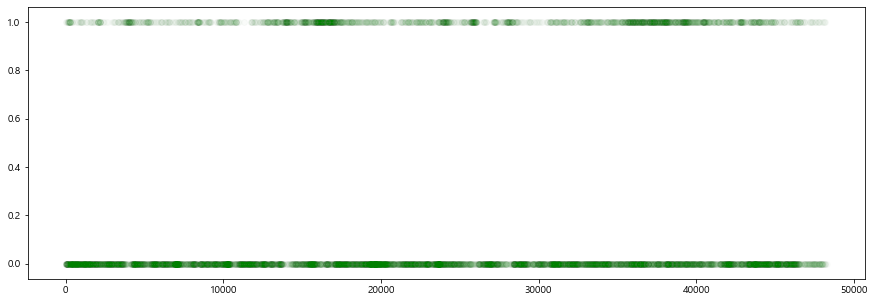

In [44]:
plt.figure(figsize=(15,5))
plt.scatter(x=data.index,y=data['total'],alpha=0.01, color='g')
plt.show()

In [45]:
from sklearn.model_selection import cross_val_score # 교차검증
from sklearn.model_selection import StratifiedKFold

In [46]:
skf = StratifiedKFold(n_splits= 5 , shuffle= True, random_state=0)

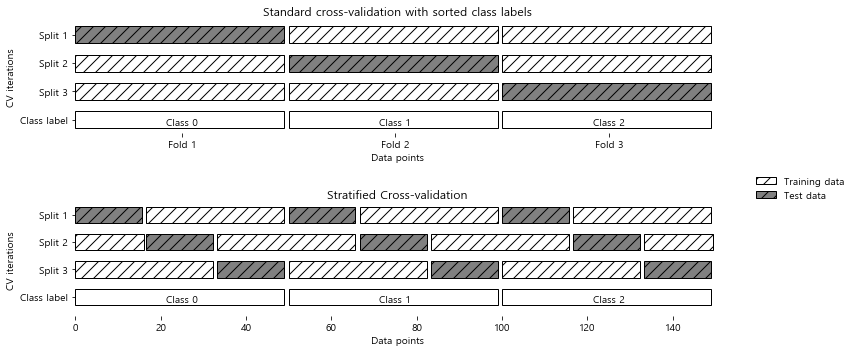

In [47]:
import mglearn
mglearn.plots.plot_stratified_cross_validation()

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
'''
Statsmodels 패키지는 검정 및 추정(test and estimation), 회귀분석(regression analysis), 
시계열 분석(time - series analysis) 등의 기능을 제공하는 파이썬 패키지이다.
'''

log_reg = LogisticRegression()

log_reg.fit(X, y)
x2 = sm.add_constant(X)
model = sm.OLS(y, x2)
result = model.fit()
print(result.summary())

print(f'score : {cross_val_score(log_reg, X, y, cv=skf).mean()}')



C:\Users\rhkdg\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rhkdg\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\rhkdg\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     13.24
Date:                Wed, 26 Aug 2020   Prob (F-statistic):          7.02e-115
Time:                        16:41:14   Log-Likelihood:                -8434.3
No. Observations:               14264   AIC:                         1.698e+04
Df Residuals:                   14208   BIC:                         1.740e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2783      0.00

C:\Users\rhkdg\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rhkdg\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rhkdg\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rhkdg\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


score : 0.7260937897117722


https://myjamong.tistory.com/80

In [49]:
f_ = ['A3_7', 'A3_8', 'A3_21','A6_5', 'A6_9', 'A6_12', 'D_TRA1_COST','A10C', 'A10D', 'A10E', 'A10G', 'A10I' ,'A10', 'DQ6A', 'Ncost', 'DNcost']

In [50]:
ob_ = ['A2_1_3.0', 'A2_1_5.0', 'A2_1_8.0', 'A4_1_5.0', 'A5_1_1.0', 'A5_1_3.0', 'A5_1_4.0', 'A5_1_7.0']

In [51]:
feature

['A1',
 'A3_1',
 'A3_2',
 'A3_3',
 'A3_4',
 'A3_6',
 'A3_7',
 'A3_8',
 'A3_9',
 'A3_11',
 'A3_15',
 'A3_17',
 'A3_18',
 'A3_19',
 'A3_21',
 'A6_4',
 'A6_5',
 'A6_8',
 'A6_9',
 'A6_12',
 'D_TRA1_S_Day',
 'D_TRA1_COST',
 'A10A',
 'A10C',
 'A10D',
 'A10E',
 'A10F',
 'A10G',
 'A10I',
 'A10',
 'DQ6A',
 'Ncost',
 'DNcost',
 'A3sum']

In [52]:
for i in f_:
    feature.remove(i)
feature

['A1',
 'A3_1',
 'A3_2',
 'A3_3',
 'A3_4',
 'A3_6',
 'A3_9',
 'A3_11',
 'A3_15',
 'A3_17',
 'A3_18',
 'A3_19',
 'A6_4',
 'A6_8',
 'D_TRA1_S_Day',
 'A10A',
 'A10F',
 'A3sum']

In [53]:
for i in ob_:
    obfeature.remove(i)
obfeature

['D_TRA1_SMONTH_8.0',
 'D_TRA1_SMONTH_9.0',
 'A2_1_1.0',
 'A2_1_10.0',
 'A2_1_11.0',
 'A2_1_14.0',
 'A2_1_4.0',
 'A2_1_9.0',
 'A4_1_6.0',
 'A4_1_7.0',
 'A4_1_8.0',
 'A4_1_9.0',
 'BAGE_1']

In [54]:
feature.remove('A3_9')
feature.remove('A3_2')
feature.remove('A3_17')
feature.remove('A3_18')
feature.remove('D_TRA1_S_Day')

In [55]:
X=pd.DataFrame()
for i in feature:
    X[i] = data[i]
    
for i in obfeature:
    X[i] = obdata[i]

y = data['total']

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for i in X.dtypes.index:
    X[i] = scaler.fit_transform(pd.DataFrame(X[i]))

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=1)

In [58]:
log_reg = LogisticRegression(C=100)

log_reg.fit(X, y)
x2 = sm.add_constant(X)
model = sm.OLS(y, x2)
result = model.fit()
print(result.summary())

print(f'score : {cross_val_score(log_reg, X, y, cv=skf).mean()}')

C:\Users\rhkdg\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rhkdg\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     24.28
Date:                Wed, 26 Aug 2020   Prob (F-statistic):          9.79e-114
Time:                        16:41:19   Log-Likelihood:                -8481.3
No. Observations:               14264   AIC:                         1.702e+04
Df Residuals:                   14237   BIC:                         1.722e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2783      0.00

C:\Users\rhkdg\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rhkdg\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rhkdg\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rhkdg\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rhkdg\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

score : 0.7265842308654703


In [59]:
from sklearn.metrics import classification_report
y_pred=log_reg.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.98      0.84     10295
           1       0.59      0.07      0.12      3969

    accuracy                           0.73     14264
   macro avg       0.66      0.52      0.48     14264
weighted avg       0.69      0.73      0.64     14264



https://no17.tistory.com/202

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn
import numpy as np


# 훈련/테스트 세트로 나누기

forest = RandomForestClassifier(n_estimators=100,                          
                                max_features = 0.8,
                                max_depth = 15,
                                n_jobs = -1,
                                random_state = 0)
forest.fit(X_train,y_train)



print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))
print(f'score : {cross_val_score(forest, X, y, cv=skf).mean()}')


# 특성 중요도
print("특성 중요도 : \n{}".format(forest.feature_importances_))

# 특성 중요도 시각화 하기

def plot_feature_importances_cancer(model):
    n_features = X.shape[1]
    plt.figure(figsize=(15,10))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.dtypes.index)
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1, n_features)
plt.show()



plot_feature_importances_cancer(forest)

In [ ]:
sort_spo = spot.value_counts()
sort_data = pd.DataFrame({'count' : sort_spo})
sort_data.to_csv('방문지.csv',encoding='euc-kr')

In [ ]:
satis = data.groupby('D_TRA1_1_SPOT1').mean()['total']
sort_satis = pd.DataFrame({'satisfaction' : satis})
sort_satis.to_csv('만족도.csv',encoding='euc-kr')

In [ ]:
datas = data.groupby('D_TRA1_1_SPOT1').mean()

In [ ]:
X_spot=pd.DataFrame()
for i in feature:
    X_spot[i] = datas[i]

In [ ]:
temp=pd.DataFrame()
temp['D_TRA1_1_SPOT1'] = data['D_TRA1_1_SPOT1']
for i in lst:
    temp[i]=data[i]

temp = pd.get_dummies(temp)
temp = temp.groupby('D_TRA1_1_SPOT1').mean()

obdatas = pd.DataFrame()
for i in obfeature:
    obdatas[i] = temp[i]

In [ ]:
X_spot = pd.concat([X_spot,obdatas],axis=1,sort=False)

In [ ]:
X_spot.to_csv('입력.csv')

In [ ]:
y_pred = pd.DataFrame(log_reg.predict_proba(X_spot))[1]

In [ ]:
y_pred.to_csv('예측.csv')

# 결과 분석

In [2]:
finaldata = pd.read_csv('SatisCount.csv', encoding='euc-kr')

In [3]:
finaldata = finaldata[(finaldata['count']<30)==False]

In [4]:
finaldata['dosi']=finaldata['spot']//1000

In [5]:
finaldata['dosi'] = finaldata['dosi'].map({
    11:'서울',
    21:'부산',
    22:'대구',
    23:'인천',
    24:'광주',
    25:'대전',
    26:'울산',
    29:'세종',
    31:'경기',
    32:'강원',
    33:'충북',
    34:'충남',
    35:'전북',
    36:'전남',
    37:'경북',
    38:'경남',
    39:'제주'
    
})

In [6]:
finaldata.corr()

,spot,count,satis
spot,1.000000,0.166646,-0.095659
count,0.166646,1.000000,0.000093
satis,-0.095659,0.000093,1.000000


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
finaldata['satis'] = scaler.fit_transform(pd.DataFrame(finaldata['satis']))

C:\Users\rhkdg\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rhkdg\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


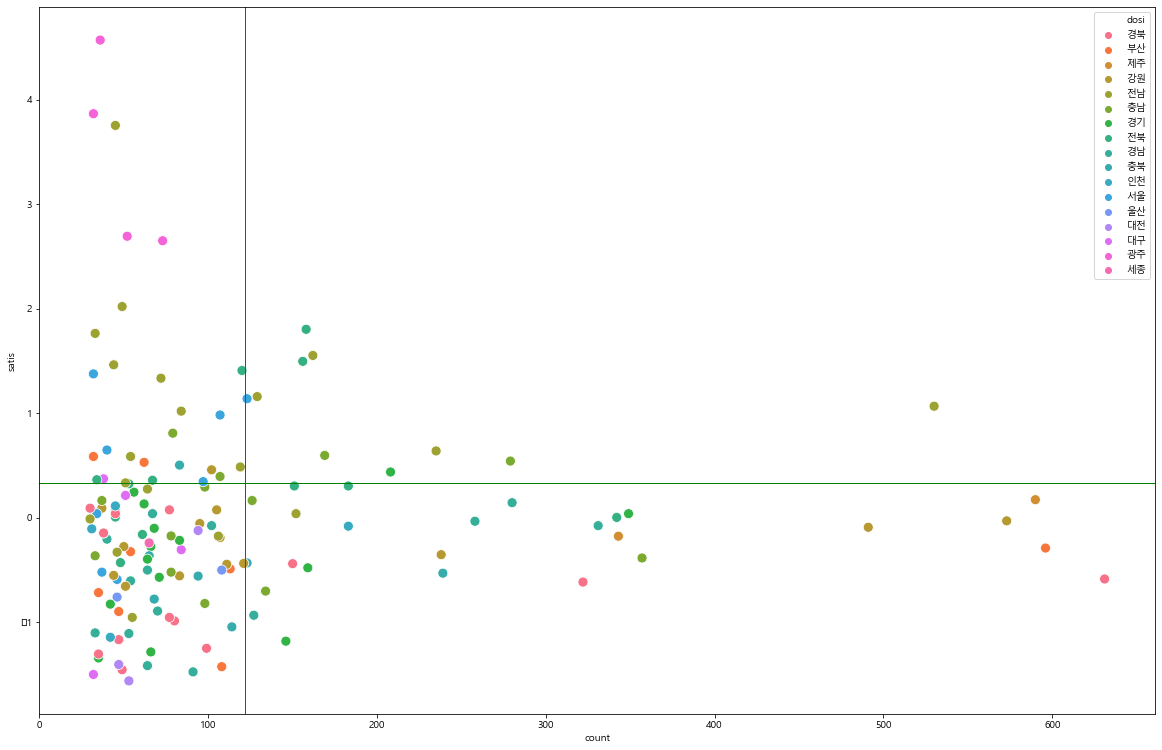

In [10]:
plt.figure(figsize=(20,13))
sns.scatterplot(x='count',y='satis',hue='dosi',data=finaldata,size_order=10,s=100 )
plt.axvline(finaldata['count'].quantile(0.75), color='g', linewidth=1)

plt.axhline(finaldata['satis'].quantile(0.75),color='g',linewidth=1)

In [67]:
finaldata[(finaldata['count'] > finaldata['count'].quantile(0.25))&(finaldata['satis'] > finaldata['satis'].quantile(0.5))]

,spot,count,satis,urban,dosi
2,39020,590,0.173230,제주특별자치도서귀포시,제주
3,32060,573,-0.029162,강원도속초시,강원
4,36020,530,1.067804,전라남도여수시,전남
5,32030,491,-0.090541,강원도강릉시,강원
7,31370,349,0.039555,경기도가평군,경기
9,35010,342,0.003704,전라북도전주시,전북
10,38090,331,-0.074879,경상남도거제시,경남
12,38050,280,0.144940,경상남도통영시,경남
13,34380,279,0.543063,충청남도태안군,충남
14,38350,258,-0.032719,경상남도남해군,경남


In [68]:
32330,38330,37070,34360,38340

(32330, 38330, 37070, 34360, 38340)

In [69]:
satis_spot = finaldata[(finaldata['satis'] > finaldata['satis'].quantile(0.8))]

In [70]:
dis_satis_spot = finaldata[(finaldata['count'] < finaldata['count'].quantile(0.25))&(finaldata['satis'] < finaldata['satis'].quantile(0.25))]

In [71]:
temp=pd.DataFrame()
temp['D_TRA1_1_SPOT1'] = data['D_TRA1_1_SPOT1']
for i in lst:
    temp[i]=data[i]

temp = pd.get_dummies(temp)
temp = temp.groupby('D_TRA1_1_SPOT1').mean()

obdatas = pd.DataFrame()
for i in obfeature:
    obdatas[i] = temp[i]
    
D=pd.DataFrame()
for i in feature:
    D[i] = data[i]
    
for i in obfeature:
    D[i] = obdata[i]
    
D['spot']=data['D_TRA1_1_SPOT1']
D_avg = D.groupby('spot').mean()

In [72]:
satis_avg = pd.DataFrame(D_avg[D_avg.index ==21090])
for i in satis_spot.spot:
    satis_avg += D_avg[D_avg.index == i]

In [73]:
u=pd.DataFrame()
for i in satis_spot.spot:
    j = D_avg[D_avg.index == i]
    u = pd.concat([u,j])
u1 = pd.DataFrame(u.mean())

In [74]:
n=pd.DataFrame()
for i in dis_satis_spot.spot:
    j = D_avg[D_avg.index == i]
    n = pd.concat([n,j])
n1 = pd.DataFrame(n.mean())

In [75]:
q = D_avg[D_avg.index == 32330].T
w = D_avg[D_avg.index == 38330].T
e = D_avg[D_avg.index == 37070].T
r = D_avg[D_avg.index == 34360].T
t = D_avg[D_avg.index == 38340].T

In [76]:
kj= D_avg[D_avg.index == 34020].T
sc= D_avg[D_avg.index == 36360].T
dy= D_avg[D_avg.index == 36310].T

In [77]:
last = pd.concat({'a만족':u1,'영월':q, '창녕':w, '영천':e,'홍성':r ,'고성':t},axis=1)

In [78]:
pd.concat({'담양':dy,'영천':e},axis=1)

,담양,영천
spot,36310.0,37070.0
A1,0.006536,0.032258
A3_1,0.771242,0.709677
A3_3,0.013072,0.000000
A3_4,0.052288,0.129032
A3_6,0.549020,0.645161
A3_11,0.130719,0.000000
A3_15,0.084967,0.032258
A3_19,0.000000,0.000000
A6_4,0.039216,0.000000


In [79]:
pd.concat({'순천':sc,'창녕':w},axis=1)

,순천,창녕
spot,36360.0,38330.0
A1,0.018692,0.000000
A3_1,0.785047,0.774194
A3_3,0.000000,0.064516
A3_4,0.018692,0.096774
A3_6,0.523364,0.774194
A3_11,0.093458,0.032258
A3_15,0.018692,0.000000
A3_19,0.009346,0.000000
A6_4,0.028037,0.032258


In [80]:
pd.concat({'공주':kj,'홍성':r},axis=1)

,공주,홍성
spot,34020.0,34360.0
A1,0.020134,0.00
A3_1,0.852349,0.80
A3_3,0.006711,0.00
A3_4,0.275168,0.12
A3_6,0.416107,0.44
A3_11,0.046980,0.04
A3_15,0.026846,0.08
A3_19,0.000000,0.04
A6_4,0.000000,0.04


In [82]:
#last.to_csv('찐막.csv',encoding='euc-kr')